Bites Data
========

We think that the analysis made by Renzo in his article "PP and Faces" 2021-03-08 is interesting from an academic point of view but it lacks real data. We would like to enrich this study by using anthropometric reference data and a statistical analysis. Our approach is to simulate the random selection of men from the general population and to verify that this selection is consistent with renzo's assumptions. 

Source of anthropometric data. : https://multisite.eos.ncsu.edu/www-ergocenter-ncsu-edu/wp-content/uploads/sites/18/2016/06/Anthropometric-Detailed-Data-Tables.pdf

Forearm-Forearm Breadth is on page 11

King, Bruce M. (2021). "Average-Size Erect Penis: Fiction, Fact, and the Need for Counseling". Journal of Sex & Marital Therapy. 47 (1): 80–89. doi:10.1080/0092623X.2020.1787279. ISSN 0092-623X. PMID 32666897.

Erect penile dimensions in a cohort of 778 Middle Eastern men: establishment of a nomogram.
Habous M, Tealab A, Williamson B, Binsaleh S, El Dawy S, Mahmoud S, Abdelwahab O, Nassar M, Mulhall JP, Veale D, Muir G.
J Sex Med. 2015 Jun;12(6):1402-6. doi: 10.1111/jsm.12894. Epub 2015 Apr 22.
PMID: 25904106

Penile dimensions and men's perceptions of condom fit and feel.
Reece M, Herbenick D, Dodge B.
Sex Transm Infect. 2009 Apr;85(2):127-31. doi: 10.1136/sti.2008.033050. Epub 2008 Dec 11.
PMID: 19074183

Am I normal? A systematic review and construction of nomograms for flaccid and erect penis length and circumference in up to 15,521 men.
Veale D, Miles S, Bramley S, Muir G, Hodsoll J.
BJU Int. 2015 Jun;115(6):978-86. doi: 10.1111/bju.13010. Epub 2015 Mar 2.
PMID: 25487360 Review.

Self-reported penis size and experiences with condoms among gay and bisexual men.
Grov C, Wells BE, Parsons JT.
Arch Sex Behav. 2013 Feb;42(2):313-22. doi: 10.1007/s10508-012-9952-4. Epub 2012 May 3.
PMID: 22552706 Free PMC article.

Revision of penile prosthesis surgery after use of penile traction therapy to increase erect penile length: case report and review of the literature.
Moskovic DJ, Pastuszak AW, Lipshultz LI, Khera M.
J Sex Med. 2011 Feb;8(2):607-11. doi: 10.1111/j.1743-6109.2010.02121.x. Epub 2010 Nov 22.
PMID: 21091884 Review.


Generation of a representative sample of a male population.
---

Several studies show that the correlation between penis size and the size of other body parts is weak. These studies have been conducted on individual height, hand size and foot size. We assume that shoulder width and penis size in erection are uncorrelated. 


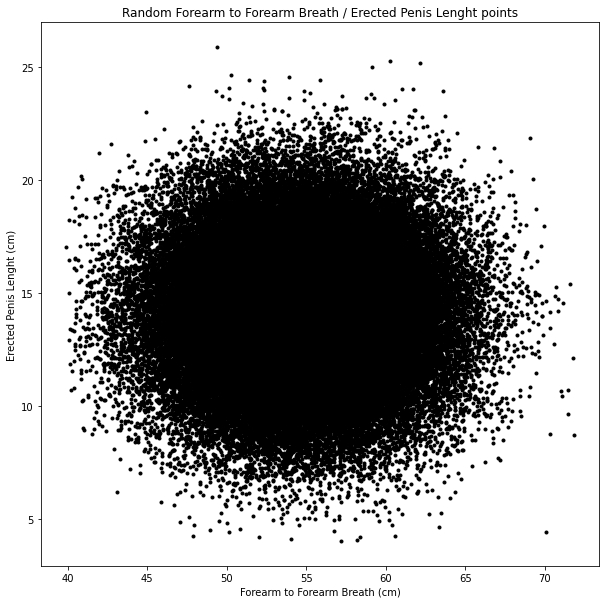

In [91]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

"""
# Forearm to Forearm Breath, normal distribution
FFBMean = 54.61
FFBStdDev = 4.36
FFBMax = 72.52
FFBMin = 39.90

#Erected Penis, normal distribution limited to the 5%-95% confidence range
PPMEan = 14.15
PPStdDev = 2.23
PPMax = 26
PPMin = 4
"""

def random_array(size):
    """
    Generate a random array of Forearm to Forearm Breath / Erected Penis Lenght points
    """
    array = np.random.normal(0, 1, (int(size),2)) * np.array([4.36, 2.66]) + np.array([54.61,14.15])
    index = (array[:, 0] <= 72.52) & (array[:, 1] <= 26) & (array[:, 0] >= 39.90) & (array[:, 1] >= 4)
    return array[index]
    
# Generate a random array of size 1e5
array = random_array(1e5)

plt.figure(figsize=(10, 10))
plt.title('Random Forearm to Forearm Breath / Erected Penis Lenght points')
plt.xlabel('Forearm to Forearm Breath (cm)')
plt.ylabel('Erected Penis Lenght (cm)')
plt.plot(array[:, 0], array[:, 1], 'k.')
plt.show()


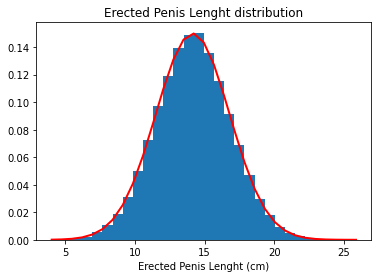

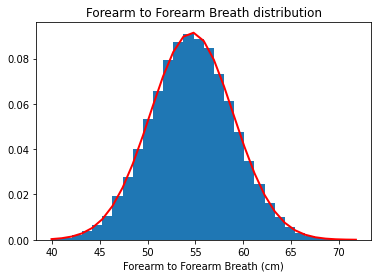

In [92]:
# Erected penis lenght density control 
count, bins, ignored = plt.hist(array[:, 1], 30, density=True)
plt.plot(bins, 1/(2.66 * np.sqrt(2 * np.pi)) * np.exp( - (bins - 14.15)**2 / (2 * 2.66**2) ), linewidth=2, color='r')
plt.title('Erected Penis Lenght distribution')
plt.xlabel('Erected Penis Lenght (cm)')
plt.show()

# Forearm to Forearm Breath density control
count, bins, ignored = plt.hist(array[:, 0], 30, density=True)
plt.plot(bins, 1/(4.36 * np.sqrt(2 * np.pi)) * np.exp( - (bins - 54.61)**2 / (2 * 4.36**2) ), linewidth=2, color='r')
plt.title('Forearm to Forearm Breath distribution')
plt.xlabel('Forearm to Forearm Breath (cm)')
plt.show()

The population generation and size distributions appear to be correct. We can continue with the size of the faces.
We take as reference the male jaw size distribution 18.20 ± 1.13 cm
Ref : https://pubmed.ncbi.nlm.nih.gov/23482900/#:~:text=Normal%20sized%20mandible%20should%20have,a%20properly%20erupting%20third%20molar.

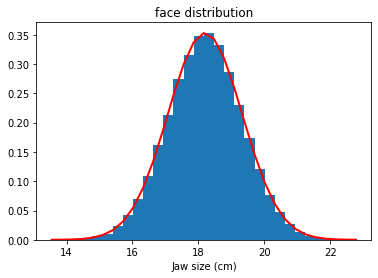

In [93]:
def face_array(size):
    """
    Generate a random array of jaw size
    """
    array = np.random.normal(18.20, 1.13, int(size))
    index = (array[:] <= 23) & (array[:] >= 13)
    return array[index]

# Generate a random array of size 1e5
face = face_array(1e5)

# Face density control
count, bins, ignored = plt.hist(face[:], 30, density=True)
plt.plot(bins, 1/(1.13 * np.sqrt(2 * np.pi)) * np.exp( - (bins - 18.20)**2 / (2 * 1.13**2) ), linewidth=2, color='r')
plt.title('face distribution')
plt.xlabel('Jaw size (cm)')
plt.show()

Configuration check and space allocation.
----
In order to evaluate the configurations, we will select a face, divide its diameter by two to get a radius. This radius will be added to the size of the erect penis to get the length of the adjacent side. The shoulder width will be divided by two to obtain the opposite side. This will allow us to find the half angle A corresponding to the angular space occupied by the participant. As long as there is angular space left, a participant is added until there is no space left.

In [94]:
FaceRadius = np.random.choice(face) / 2
Guy = array[int(np.random.random() * array.shape[0])]
Adjacent = FaceRadius + Guy[1]
Opposite = Guy[0] / 2
Angle = np.arctan(Opposite / Adjacent)
print("Face radius (cm):", FaceRadius)
print("Guy shoulder and penis size (cm):", Guy)
print("Angle (rad):", Angle)



Face radius (cm): 8.75698331457156
Guy shoulder and penis size (cm): [46.36253332 15.28400413]
Angle (rad): 0.7671943348408056


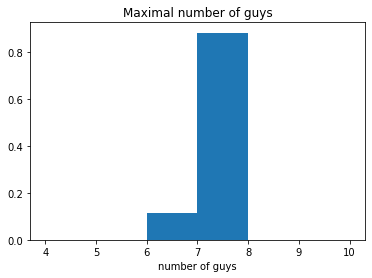

In [95]:
results = []
for i in range(int(1e5)):
    AngularSpace = np.pi * 2
    NumberOfGuy = 0
    while AngularSpace > 0:
        FaceRadius = np.random.choice(face) / 2
        Guy = array[int(np.random.random() * array.shape[0])]
        Adjacent = FaceRadius + Guy[1]
        Opposite = Guy[0] / 2
        AngularSpace -= np.arctan(Opposite / Adjacent)
        NumberOfGuy += 1
    NumberOfGuy -= 1 #The last guy had no room to play
    results.append(NumberOfGuy)
# Maximal number of guys graph
bins_list = [4, 5, 6, 7, 8, 9, 10]
count, bins, ignored = plt.hist(results[:], bins = bins_list, density=True)
plt.title('Maximal number of guys')
plt.xlabel('number of guys')
plt.show()

Conclusion 
---
We can deduce that a more realistic maximum number of participants in a renzo configuration is 6 or 7 participants. 